**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.


**Forecasting**

Forcasting is reading today's data to make predictions for future data

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

The above code is used for:
1. Import pandas (command in Python to import pandas module. Pandas is an open-source library used for data analysis and data structure manipulation in Python.)
2. Import numpy (command in Python to import the numpy module. NumPy is a Python library used for efficient numerical computations. It provides a powerful multidimensional array data structure, as well as a variety of mathematical functions that can be applied to those arrays.)
3. import matplotlib.pyplot (command in Python to import the matplotlib.pyplot module. Matplotlib is a graphing library used to create data visualizations in the form of graphs, plots, diagrams, and so on.)
4. import seaborn(command in Python to import the seaborn module. Seaborn is a data visualization library that acts as a high-level styling and interface for creating engaging and informative data visualizations.)
5. import math (command in Python to import the math module. The math module is a built-in Python module that provides commonly used math functions.)
6. import datetime (command in Python to import the datetime module. The datetime module is a built-in Python module that provides functions and classes for working with dates, times, and related objects.)

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset?resource=download

**About dataset**

Historically, gold had been used as a form of currency in various parts of the world including the USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country. Recently, emerging world economies, such as China, Russia, and India have been big buyers of gold, whereas the USA, SoUSA, South Africa, and Australia are among the big seller of gold.

Forecasting rise and fall in the daily gold rates can help investors to decide when to buy (or sell) the commodity. But Gold prices are dependent on many factors such as prices of other precious metals, prices of crude oil, stock exchange performance, Bonds prices, currency exchange rates, etc.

The challenge of this project is to accurately predict the future adjusted closing price of Gold ETF across a given period of time in the future. The problem is a regression problem, because the output value which is the adjusted closing price in this project is continuous value.

Data for this study is collected from November 18th 2011 to January 1st 2019 from various sources. The data has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.

The dataset has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.

The historical data of Gold ETF fetched from Yahoo finance has 7 columns, Date, Open, High, Low, Close, Adjusted Close, and Volume, the difference between Adjusted Close and Close is that the closing price of a stock is the price of that stock at the close of the trading day. Whereas the adjusted closing price takes into account factors such as dividends, stock splits, and new stock offerings to determine a value. So, Adjusted Close is the outcome variable which is the value you have to predict.



In [2]:
# https://drive.google.com/file/d/1k8bOH1_aAljH-IUXdb6D7ngoEjBYATnc/view?usp=sharing

!gdown 1k8bOH1_aAljH-IUXdb6D7ngoEjBYATnc

Downloading...
From: https://drive.google.com/uc?id=1k8bOH1_aAljH-IUXdb6D7ngoEjBYATnc
To: /content/FINAL_USO.csv
100% 1.04M/1.04M [00:00<00:00, 176MB/s]


In [3]:
train_data = pd.read_csv('FINAL_USO.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


To display datetime, to be used to analyze timeseries.
description of the features
1. Open is the opening price of gold
2. High is the highest price for a one-day transaction
3. Low is the lowest price of one day's transactions
4. Close is the closing price
5. Adj close the price that is not too far from the closing price, the difference from the close is that it is more accurate than the close.
6. Volume is the total transaction

Check missing values

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

which is coding to find out whether the data is clean from missing values.
If there is a difference in the length of the data, there must be a missing value.
in the data above there is no difference in the length of the data, the length of the data is the same. then there is no missing value


Check statistic vales for every features

In [5]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


The above code is used for to check the status of the features, namely the Mean, median and also the maximum value.

Handle datetime data for time series

In [6]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


Time series is data related to datetime as a reference.
In the code above to create data in a datetime data type format, then change the previous index to day and date. Or make date an index

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

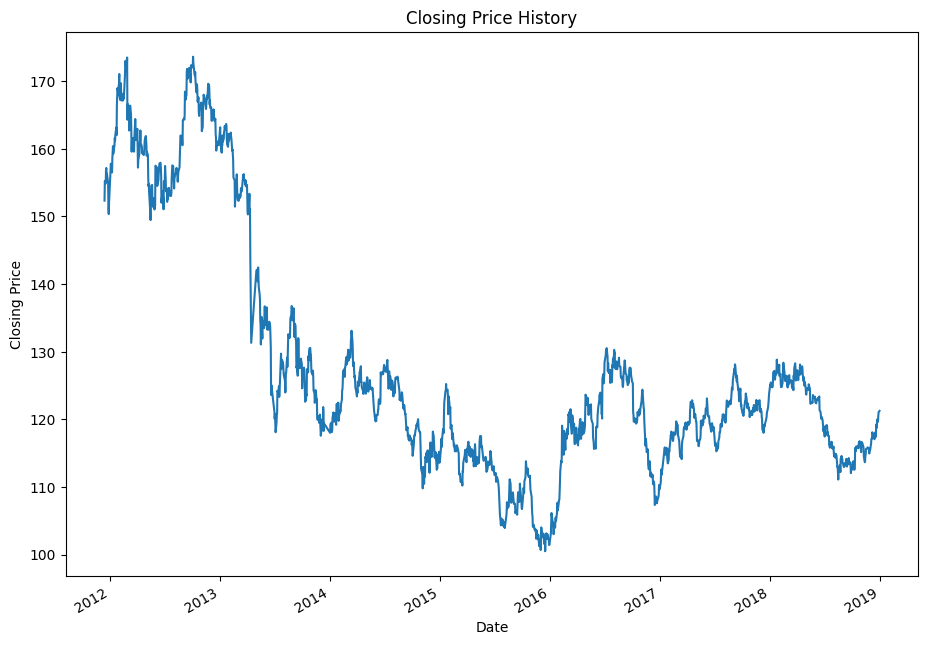

In [7]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

The code above is used to check the data. Coding is used to display closing data, the dataset contains about 8 years of data. The data starts from 2012-2019. The trend of the data obtained is up and down, there was an increase in prices in 2012-2013. and then the price decreased and was unable to reach the price increase as in 2012-2013.
the peak of the decline in gold prices occurred in 2016

<Figure size 1600x800 with 0 Axes>

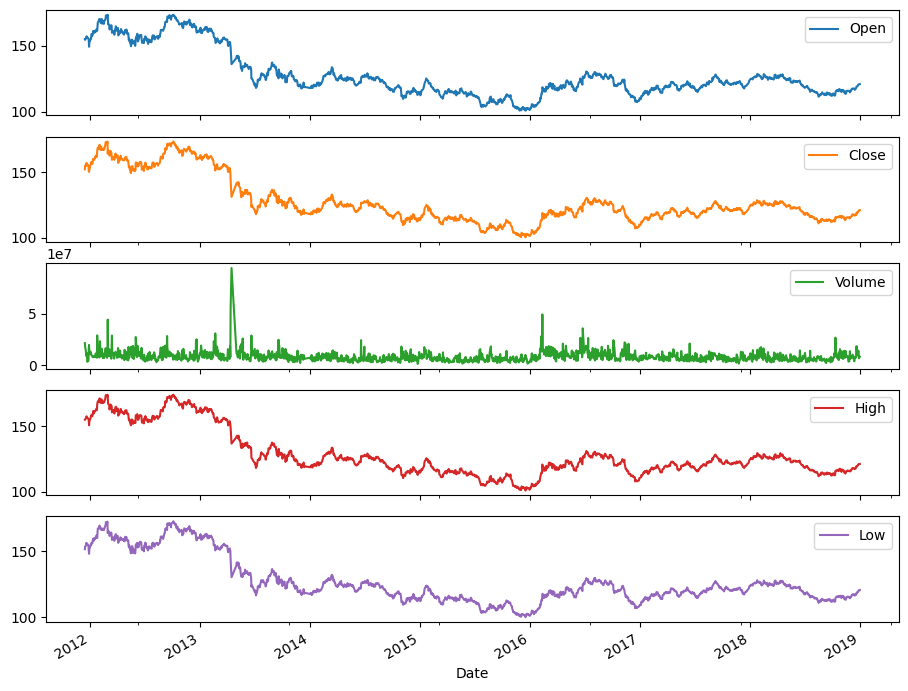

In [8]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

The code above is to check other features, such as:
1. Open, namely the opening price of the trend up and down
2. Close, namely the closing price of the trend up and down
3. Volume is the number of transactions, namely people whose transactions are just that, not increasing or decreasing. the trend is also up and down
4. Transaction prices fluctuate

In [9]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

The coding above is used to create new features, namely reading the highest and lowest prices and reading the opening and closing prices. And also the percentage

In [10]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Coding is used to insert additional features into the dataset

In [11]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

86


<ipython-input-11-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


The coding above is used to make the close or closing price of gold a label, which is used for predictions as a label. because the closing price determines the price of gold on that day or at what time.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

The coding above is used later to determine the model.

1. from sklearn.preprocessing import StandardScaler (command in Python to import the StandardScaler class from the sklearn.preprocessing module in the scikit-learn library. Scikit-learn is a popular library in Python used for machine learning and data mining. The sklearn.preprocessing module provides various functions and classes to perform data pre-processing, including data transformation and normalization.)
2. from sklearn.linear_model import LinearRegression, Ridge (command in Python to import the LinearRegression and Ridge classes from the sklearn.linear_model module in the scikit-learn library. Scikit-learn is a popular library in Python used for machine learning and data mining. The sklearn.linear_model module provides various functions and classes for performing linear regression and Ridge regression in the context of machine learning.)
3. from sklearn.ensemble import RandomForestRegressor (command in Python to import the RandomForestRegressor class from the sklearn.ensemble module in the scikit-learn library. Scikit-learn is a popular library in Python used for machine learning and data mining. The sklearn.ensemble module provides various functions and classes for ensemble learning, where multiple models (such as decision trees) are combined to improve predictive performance.)
4. from sklearn.svm import SVR (command in Python to import the SVR class from the sklearn.svm module in the scikit-learn library. Scikit-learn is a popular library in Python used for machine learning and data mining. The sklearn.svm module provides various functions and classes for Support Vector Machines (SVM) in the context of machine learning.)
5. from sklearn.model_selection import train_test_split (command in Python to import the train_test_split function from the sklearn.model_selection module in the scikit-learn library. Scikit-learn is a popular library in Python used for machine learning and data mining. The sklearn.model_selection module provides various functions and classes to perform model evaluation, cross-validation, and data splitting.)
6. from sklearn.metrics import mean_squared_log_error (command in Python to import the mean_squared_log_error function from the sklearn.metrics module in the scikit-learn library.Scikit-learn is a popular library in Python used for machine learning and data mining. The sklearn.metrics module provides a variety of functions for measuring the performance and evaluation of machine learning models.)

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [13]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-13-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


The coding above is used to normalize the data because the data varies in size and the intervals are quite far. it is necessary to normalize the data so that the price is not too far range. speeds up training and reduces bias.

---



**SLASHING**

In [14]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

The coding above is used to determine data x

In [15]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-15-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


The coding above is used to determine the y data used from the label

**Splitting**

Splitting dataset separation of train data and test data. using two models, namely linear regression and random forest. A random forest is also a regression, but it's more about trees. This random forest contains a lot of trees, then voting on which tree is good. So the best model will be selected as a trainee and testing model.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [18]:
lr_confidence

0.6870652271736765

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [20]:
rf_confidence

0.7819452153589753

In [21]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-21-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

done by trainees with a count of 86400 seconds with a count of one day. In one day so many seconds.

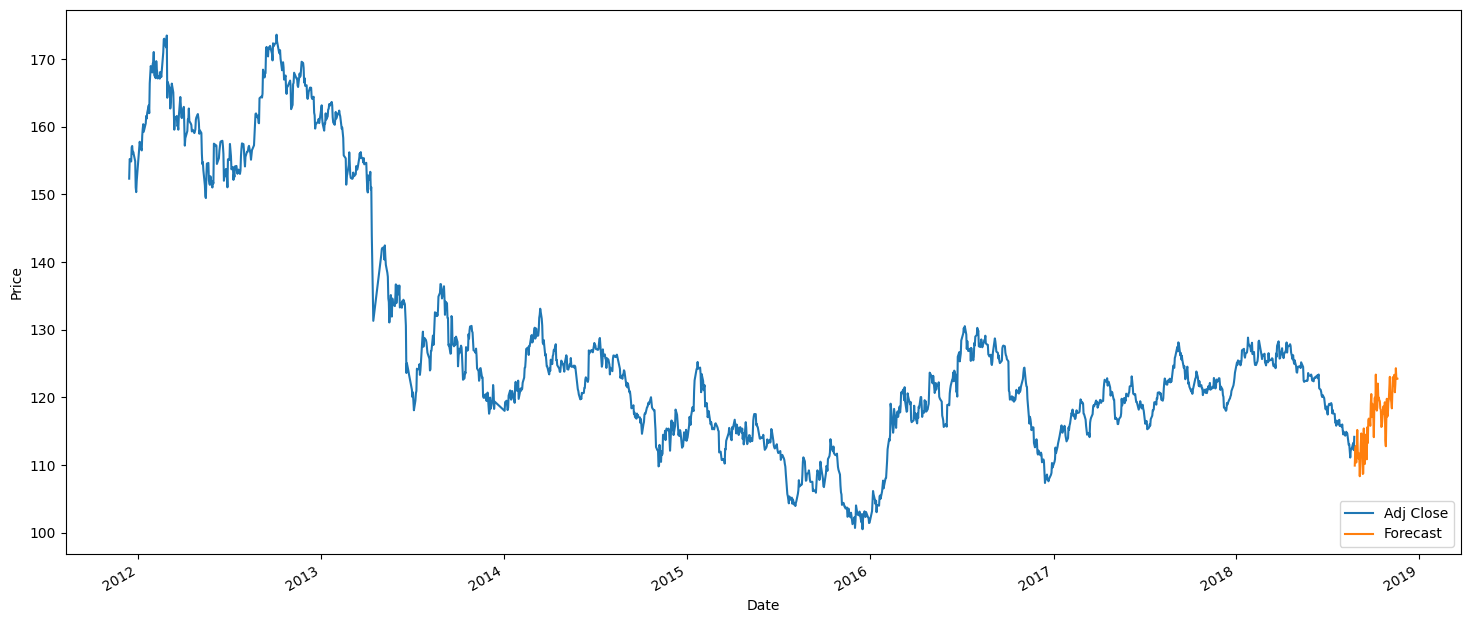

In [22]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

The coding above is used to predict the next few months, the orange color is data prediction. After reading the previous data, a gold price prediction is then made for the future.  